In [3]:
print(1+2)

3


## Time series analysis in Python

this is through the tutorials on 
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [1]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [2]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [5]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [6]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [9]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [10]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [14]:
#Now that the Date column is the correct data type, let’s set it as the DataFrame’s index.
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

KeyError: "None of ['Date'] are in the columns"

In [15]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatively, we can consolidate the above steps into a single line, using the index_col and parse_dates parameters of the read_csv() function. This is often a useful shortcut.

In [22]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [24]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday.name # will change this 

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Date
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Date
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Date
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Date
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Date


In [28]:
opsd_daily.loc['2017-08-10']

Consumption     1351.491
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name        Date
Name: 2017-08-10 00:00:00, dtype: object

In [30]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Date
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Date
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Date


In [32]:
opsd_daily.loc['2012'] # opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,1,Date
2012-01-02,1269.581,207.327,6.574,213.901,2012,1,Date
2012-01-03,1334.745,473.468,24.679,498.147,2012,1,Date
2012-01-04,1347.136,499.804,14.681,514.485,2012,1,Date
2012-01-05,1376.658,523.851,5.071,528.922,2012,1,Date
...,...,...,...,...,...,...,...
2012-12-27,1068.617,302.195,13.111,315.306,2012,12,Date
2012-12-28,1109.424,152.562,24.007,176.569,2012,12,Date
2012-12-29,1014.550,294.502,38.122,332.624,2012,12,Date


## Visualizing time series data

In [33]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

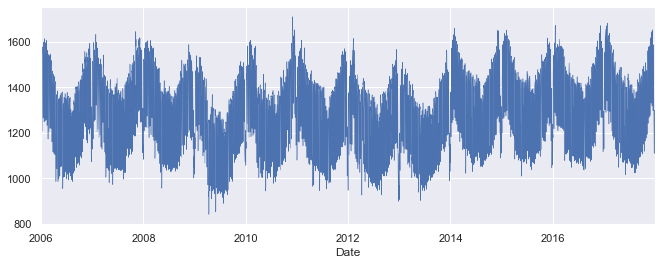

In [34]:
opsd_daily['Consumption'].plot(linewidth=0.5);

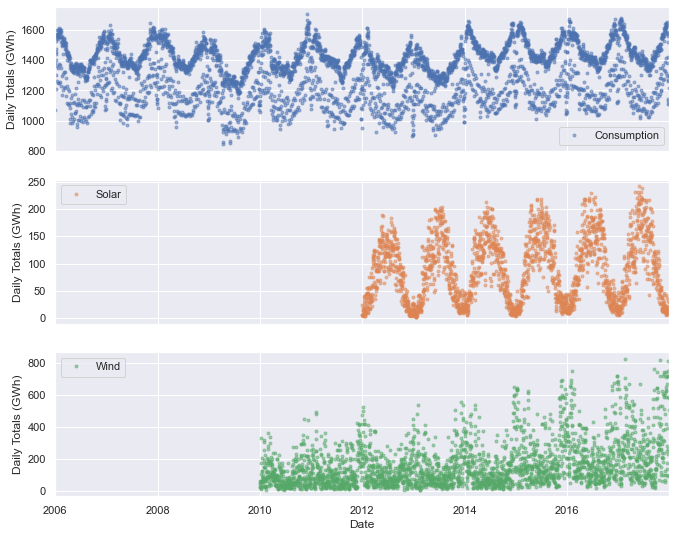

In [35]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')